# Basic Time Series Models

## Introduction

We've looked at time series and what they might look like. Now why do we need to model time series? Essentially, you're trying to find patterns and understand the data in a way that you 
can use this information to (hopefully) make accurate predictions about the future.

In this lesson you'll learn about two basic time series models: the white noise and random walk models.

## Objectives

You will be able to:

- Explain the properties of a white noise model 
- Explain the properties of a random walk model 


## A White Noise model

The white noise model is the simplest example of a true stationary process - basically what we were talking about when we looked at the plot for data without trend (the monthly NYSE returns). Let's plot this again below: 

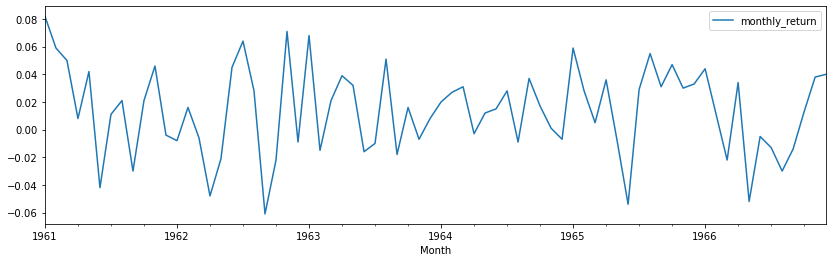

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

nyse.plot(figsize = (14,4))
plt.show();

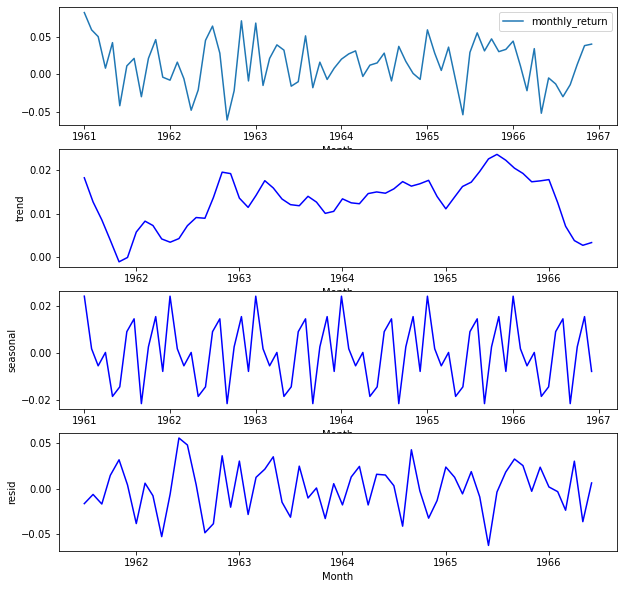

In [20]:
### From MySelf

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns


datas = [nyse, stat_result.trend, stat_result.seasonal, stat_result.resid]

figs, axes = plt.subplots(nrows = len(data), figsize = (10,10))
models = ['additive', 'multiplicative']

stat_result = seasonal_decompose(nyse, model=models[0])


for i in range(len(data)):
    sns.lineplot(data = datas[i], ax = axes[i], color = "blue")



In [25]:
### From MySelf

from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(nyse)


dfoutput = pd.Series(adfuller_result[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
for key, value in adfuller_result[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


The white noise model has three properties:

- Fixed and constant mean
- Fixed and constant variance
- No correlation over time (we'll talk about correlation in time series later, essentially, what this means is that the pattern seems truly "random") 

A special case of a white noise model is Gaussian white noise, where the constant mean is equal to zero, and the constant variance is equal to 1. You'll see later on that a white noise model is useful in many contexts!

More information on white noise series can be found [here](https://machinelearningmastery.com/white-noise-time-series-python/). You can disregard the content on autocorrelation functions for now, we'll cover that later!

## A Random Walk model

As opposed to the white noise model, the random walk model, however, has: 

- No specified mean or variance
- A strong dependence over time

The changes over time are basically a white noise model. Mathematically, this can be written as:

$$\large Y_t = Y_{t-1} + \epsilon_t$$

Where $\epsilon_t$ is a *mean zero* white noise model!

Random walk processes are very common in finance. A typical example is exchange rates. The idea is that generally speaking (and unless any drastic events happen), tomorrow's currency exchange rate will be strongly influenced by today's exchange rate, with a small change (either positive or negative). The dataset below contains the exchange rates for the Euro, Australian Dollar, and Danish Crone with the US Dollar, from January 2000 until November 26, 2018.

In [26]:
xr = pd.read_csv('exch_rates.csv')

xr['Frequency'] = pd.to_datetime(xr['Frequency'])
xr.set_index('Frequency', inplace=True)

xr.tail()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2018-11-22,0.876962,1.378672,6.543541
2018-11-23,0.880902,1.383721,6.573115
2018-11-24,NaN,NaN,NaN
2018-11-25,NaN,NaN,NaN
2018-11-26,0.880049,1.378509,6.566224


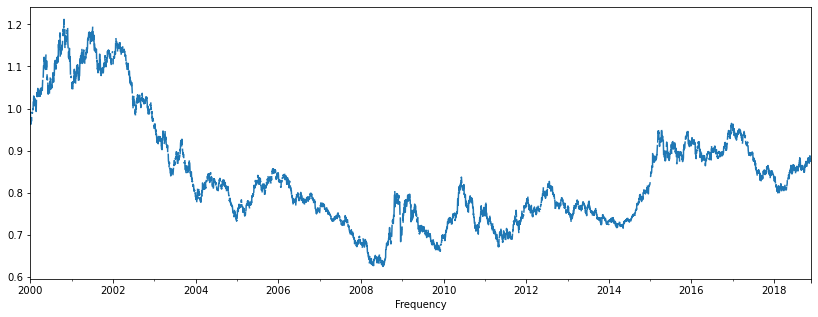

In [27]:
xr['Euro'].plot(figsize = (14,5));

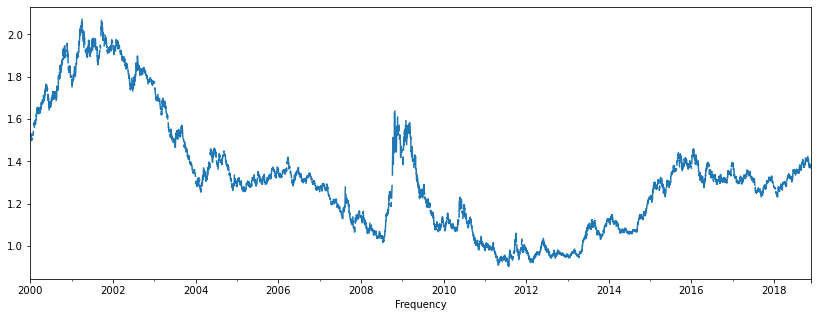

In [28]:
xr['Australian Dollar'].plot(figsize = (14,5));

More on random walk can be found [here](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/).

## A Random Walk with a Drift

An extension of the random walk model is a so-called "random walk with a drift", specified as follows:

$$\large Y_t = c + Y_{t-1} + \epsilon_t$$

Here, there is a drift parameter $c$, steering in a certain direction! You'll get more insight in what a random walk model looks like in the lab that follows!

## Summary

Great, you now know how white noise and random walk models work. In the next lab, you'll practice this knowledge to build these models from scratch!